# Assignment #2 - Classification

<font color="red"> <b> Due: April 10  EOD</b> </font>

<font color="blue"> Vaibhav Rao </font>

# I. Introduction

I am going to use the sensor data that has values from ECG, TEB and EDA readings by sensors placed on individuals.
I would be using models for Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron and logistic regression and seeing the Accuracy and Confusion Matrix for those.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/bank+marketing
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (data download link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip)


### Have Picked the sensor data for this classification.

Below we read the dataset and explore relevant information in the datasets.

### About the Dataset.

Here we have a dataset of 40 individuals. Each individual spends 280 seconds on 4 activities. Hence the dataset is well balanced. The readings are taken for a 10 second window. The above data plotted is of individual 1 on activity 1.

Hence for each activity we have 1120 recordings (40*28) and we have 4480 recording for all 4 activities of 40 individuals.

#### About the activities:

In order to elicit the different activities, we have used a segment documentary called Earth to induce Neutral Activity. In order to elicit emotional activity, we used a set of segments extracted from several validated movies. American History X (1998) by Savoy Pictures, I am legend (2007) by Warner Bross, Life is beautiful (1997) by Miramax, and Cannibal Holocaust (1980) by F.D. Cinematografica. The mental activity was elicited using a set of games based on mental arithmetic and playing the well-known game Tetris, used several times to elicit mental activity.

-Neutral activity, registered during the last 140 s of the first movie (the documentary). As each individual watched each movie twice, there are 280 s for each individual in the database
-Emotional activity, registered during the viewing of the last 70 s of the second and third movies (140 s); therefore, we obtained a total of 280 s per individual.
-Mental activity, registered during the last 140 s of both games, producing 280 s in total.
-Physical activity registered during the last 280 s of the physical activity stage. To elicit physical load the participant had to go up and down the stairs for five minutes.


In [1]:
import pandas as pd
import numpy as np

## READ label information that is in a different text file
with open("sensors-data/labels.txt") as f:
    content = f.read().splitlines()

## Read our "," separated features from the data file
data = pd.read_csv("sensors-data/data.txt", sep=",", header=None)
data.columns = content


In [2]:
#Print the Headers for all the features for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity: 1-neutral, 2-emotional, 3-mental and 4-physical
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [2]:
# Modify the target values in Dataset so that we can print them

from sklearn.preprocessing import LabelEncoder
le_Y = LabelEncoder()
(data['Activity: 1-neutral, 2-emotional, 3-mental and 4-physical']) = le_Y.fit_transform(data['Activity: 1-neutral, 2-emotional, 3-mental and 4-physical'])

In [4]:
#Lets just see the values for 533 features for individual 1
data.head(28)

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis,EDA_Functionals_power_Filt2max,EDA_Functionals_power_Filt2min,EDA_Functionals_power_Filt2prctile25,EDA_Functionals_power_Filt2prctile75,EDA_Functionals_power_Filt2geomean(abs),EDA_Functionals_power_Filt2harmmean,EDA_Functionals_power_Filt2mad,EDA_Functionals_power_Filt2baseline,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.534250,17.38820,8.05589,1.802470,1413310.0,3028080.0,0
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.515130,16.59140,7.81769,1.523490,1390180.0,3016420.0,0
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.259590,15.23120,7.11684,1.258600,1234110.0,3004430.0,0
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.139240,14.46630,6.70236,1.266430,1102720.0,2992170.0,0
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.935950,12.54930,6.08647,1.223870,954322.0,2979610.0,0
5,1,0.007740,0.177649,-0.012168,-0.02737,0.984125,5.96674,0.91063,-0.75637,-0.08737,...,1015.64,420099000.0,0.008836,1.753610,11.45940,5.51315,1.169720,827561.0,2966780.0,0
6,1,-0.012270,0.180457,-0.032297,-0.05237,0.937233,5.73374,0.91063,-0.76237,-0.11437,...,1015.79,362617000.0,0.005280,1.726440,10.52020,5.12044,1.015240,714134.0,2953740.0,0
7,1,-0.007162,0.184272,-0.026226,-0.03537,0.849528,5.46290,0.81163,-0.76237,-0.11637,...,1016.08,340513000.0,0.006560,1.619530,9.61980,4.79998,1.015360,670280.0,2940650.0,0
8,1,-0.015890,0.181058,-0.035534,-0.04337,0.898922,5.52209,0.81163,-0.76237,-0.12237,...,1016.01,366238000.0,0.009397,1.656320,9.91313,4.98051,1.081940,721015.0,2927750.0,0
9,1,-0.013506,0.180362,-0.031537,-0.04537,0.860308,5.60047,0.81363,-0.78937,-0.11137,...,1015.62,407162000.0,0.002714,1.762480,10.92700,5.31570,0.955554,802111.0,2915120.0,0


##### Checking the correlation of the 174 parameters of the ECG value with the Neural Activities 
we see most ECG Features having a good correlation with our final predictions

In [5]:
data_ECG = data.iloc[:,1:175]
data_target = data['Activity: 1-neutral, 2-emotional, 3-mental and 4-physical']
data_corr = data_ECG.join(data_target)
data_corr.corr()

,ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,ECG_original_prctile75,...,ECG_LF_HF,ECG_MF_HF,ECG_HF_TF,ECG_LF_MF_HF,ECG_CCV_LF,ECG_CCV_HF,ECG_RMSSDD,ECG_A1_DFA,ECG_A2_DFA,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
ECG_original_mean,1.000000,0.261175,0.991501,0.913595,-0.254409,-0.012629,0.320761,-0.117415,0.462106,0.712081,...,0.100737,-0.135457,-0.143579,-0.135147,0.411004,0.425385,0.294660,-0.143723,-0.036357,0.249629
ECG_original_std,0.261175,1.000000,0.268125,0.290984,-0.276402,-0.246734,0.836362,-0.833158,-0.648999,0.828461,...,0.297660,-0.324248,-0.483650,-0.320684,0.530557,0.565214,0.591456,-0.329651,-0.060131,0.450912
ECG_original_trimmean25,0.991501,0.268125,1.000000,0.943688,-0.295331,-0.016901,0.298215,-0.143808,0.460076,0.706961,...,0.093552,-0.127450,-0.134620,-0.127110,0.422744,0.434142,0.302640,-0.141955,-0.033639,0.256437
ECG_original_median,0.913595,0.290984,0.943688,1.000000,-0.284797,-0.026138,0.272096,-0.161065,0.340827,0.653806,...,0.067346,-0.100769,-0.105880,-0.100401,0.432696,0.434479,0.315186,-0.126727,-0.027003,0.263114
ECG_original_skewness,-0.254409,-0.276402,-0.295331,-0.284797,1.000000,0.260327,-0.134186,0.475423,-0.009487,-0.325600,...,-0.107203,0.116956,0.214668,0.114754,-0.265341,-0.275289,-0.229251,0.122894,0.001541,-0.280015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECG_CCV_HF,0.425385,0.565214,0.434142,0.434479,-0.275289,0.021045,0.573014,-0.511769,-0.151638,0.605738,...,0.175522,-0.254784,-0.286762,-0.253982,0.986643,1.000000,0.664831,-0.346257,-0.191642,0.328049
ECG_RMSSDD,0.294660,0.591456,0.302640,0.315186,-0.229251,-0.006923,0.595118,-0.551273,-0.265141,0.549733,...,0.273992,-0.340326,-0.405924,-0.338152,0.631777,0.664831,1.000000,-0.431698,-0.197941,0.316596
ECG_A1_DFA,-0.143723,-0.329651,-0.141955,-0.126727,0.122894,0.007287,-0.385961,0.355843,0.150204,-0.297461,...,-0.388138,0.511548,0.478467,0.510996,-0.298030,-0.346257,-0.431698,1.000000,0.172913,-0.266789
ECG_A2_DFA,-0.036357,-0.060131,-0.033639,-0.027003,0.001541,-0.047234,-0.051798,0.040688,0.025028,-0.060818,...,0.001313,0.038911,-0.068003,0.041044,-0.186329,-0.191642,-0.197941,0.172913,1.000000,0.105989


#### A Scatter Plot with 2 columns and class target variable

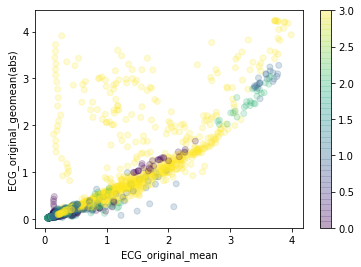

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data_corr.iloc[:,1], data_corr.iloc[:,10], alpha=0.2, c=data_corr.iloc[:,-1])
plt.xlabel(data_corr.columns[0])
plt.ylabel(data_corr.columns[10]);
plt.colorbar()

# III. Method

Summarize the Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network.
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
Each implementation will be followed by a separate cell that should include
 - review of the 4 classification models 
 - your implementation and description


### Method

#### General Processing for all the models.

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn


#Apply Features from 1:534 (533 Features) to our X
X = np.array(data.iloc[:,1:534])

#Take our target Variable (Last Column as Y)
Y = np.array(data.iloc[:,534])

# Normalize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

#Convert to One-hot encoding using PRML
from prml.preprocess import LabelTransformer
Y = LabelTransformer().encode(Y)

#Use train test split to load 20% of data for test and rest for train
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)



#### Model 1 - Least Square Classifier (PRML)

The Least Square classifier would minimize the error and return the best possible predictions based on this algorithm

In [9]:
from prml.linear import LeastSquaresClassifier

lsc_classifier = LeastSquaresClassifier()
lsc_classifier.fit(X_train, Y_train)


#### Model 2 - Perceptron

In [10]:
from sklearn.linear_model import Perceptron

#Sklearn does not take a one-hot encoded array
Y_train_1d = LabelTransformer().decode(Y_train)

model_percept = Perceptron()
model_percept.fit(X_train, Y_train_1d)


Perceptron()

#### Model 3 - Logistic Regression (Softmax)
Since we have a Muliclass dataset, we use the PRML libraries Softmax regression which would convert the probabilities of all the classes with a sum of 1, hence predicting the best probability class for our test data

In [11]:
from prml.linear import SoftmaxRegression

model_softmax = SoftmaxRegression()
model_softmax.fit(X_train, Y_train)


#### Model 4 - Fisher Linear Discriminant

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Use PRML to convert the Y_train to a 1D vector
Y_train_1d = LabelTransformer().decode(Y_train)

model_fish = LinearDiscriminantAnalysis()
model_fish.fit(X_train, Y_train_1d)


LinearDiscriminantAnalysis()

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

#### Using the Least Square Classifier Model and Printing Accuracy and Confusion Matrix

Accuracy Score for Least Square Classifier: 84.26%
Precision score for Class 1 - Neutral:97.58%
Precision score for Class 2 - Emotional:72.37%
Precision score for Class 3 - Mental:69.48%
Precision score for Class 4 - Physical:100.00%


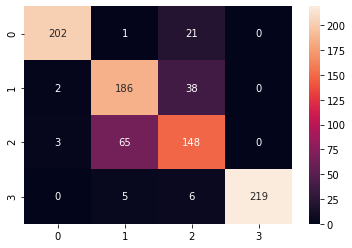

In [13]:
pred = lsc_classifier.classify(X_test)

#Convert Predictions to one-hot
pred = LabelTransformer().encode(pred)

#Use SKLearn Accuracy Score to get our accuracy 
test_acc_predict = accuracy_score(Y_test, pred)

#Look at the confusion matrix.
confusionmatrix = confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

print("Accuracy Score for Least Square Classifier: {:.2f}%".format(test_acc_predict*100))

#Plot confusion Matrix as a heat map
sn.heatmap(confusionmatrix, annot=True, fmt="d")

precision = precision_score(Y_test, pred, average=None)
print("Precision score for Class 1 - Neutral:{:.2f}%".format(precision[0]*100))
print("Precision score for Class 2 - Emotional:{:.2f}%".format(precision[1]*100))
print("Precision score for Class 3 - Mental:{:.2f}%".format(precision[2]*100))
print("Precision score for Class 4 - Physical:{:.2f}%".format(precision[3]*100))


#### Using the Perceptron Model and Printing Accuracy and Confusion Matrix

Accuracy Score for Perceptron Classifier: 83.26%
Precision score for Class 1 - Neutral:90.41%
Precision score for Class 2 - Emotional:71.66%
Precision score for Class 3 - Mental:71.64%
Precision score for Class 4 - Physical:99.13%


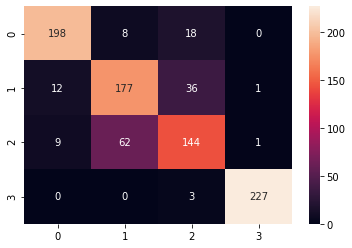

In [14]:
pred = model_percept.predict(X_test)

#Convert Predictions to one-hot
pred = LabelTransformer().encode(pred)

#Use SKLearn Accuracy Score to get our accuracy 
test_acc_predict = accuracy_score(Y_test, pred)

#Look at the confusion matrix.
confusionmatrix = confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

print("Accuracy Score for Perceptron Classifier: {:.2f}%".format(test_acc_predict*100))
#Plot confusion Matrix as a heat map
sn.heatmap(confusionmatrix, annot=True, fmt="d")

precision = precision_score(Y_test, pred, average=None)
print("Precision score for Class 1 - Neutral:{:.2f}%".format(precision[0]*100))
print("Precision score for Class 2 - Emotional:{:.2f}%".format(precision[1]*100))
print("Precision score for Class 3 - Mental:{:.2f}%".format(precision[2]*100))
print("Precision score for Class 4 - Physical:{:.2f}%".format(precision[3]*100))


#### Using the Logistic Regression(Softmax) Model and Printing Accuracy and Confusion Matrix

Accuracy Score for Logistic Regression: 77.12%
Precision score for Class 1 - Neutral:92.75%
Precision score for Class 2 - Emotional:76.30%
Precision score for Class 3 - Mental:53.48%
Precision score for Class 4 - Physical:95.38%


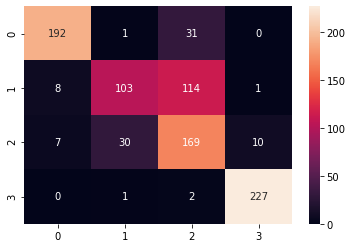

In [15]:
pred = model_softmax.classify(X_test)

#Convert Predictions to one-hot
pred = LabelTransformer().encode(pred)

#Use SKLearn Accuracy Score to get our accuracy 
test_acc_predict = accuracy_score(Y_test, pred)

#Look at the confusion matrix.
confusionmatrix = confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

print("Accuracy Score for Logistic Regression: {:.2f}%".format(test_acc_predict*100))
#Plot confusion Matrix as a heat map
sn.heatmap(confusionmatrix, annot=True, fmt="d")

precision = precision_score(Y_test, pred, average=None)
print("Precision score for Class 1 - Neutral:{:.2f}%".format(precision[0]*100))
print("Precision score for Class 2 - Emotional:{:.2f}%".format(precision[1]*100))
print("Precision score for Class 3 - Mental:{:.2f}%".format(precision[2]*100))
print("Precision score for Class 4 - Physical:{:.2f}%".format(precision[3]*100))


#### Using the Fisher LDA Model and Printing Accuracy and Confusion Matrix

Accuracy Score for Fisher LDA Classifier: 82.37%
Precision score for Class 1 - Neutral:98.43%
Precision score for Class 2 - Emotional:69.73%
Precision score for Class 3 - Mental:66.37%
Precision score for Class 4 - Physical:100.00%


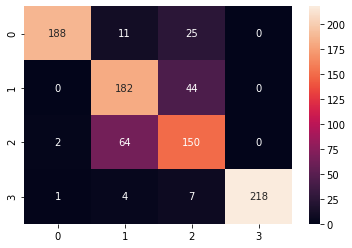

In [16]:
pred = model_fish.predict(X_test)

#Convert Predictions to one-hot
pred = LabelTransformer().encode(pred)

#Use SKLearn Accuracy Score to get our accuracy 
test_acc_predict = accuracy_score(Y_test, pred)

#Look at the confusion matrix.
confusionmatrix = confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

print("Accuracy Score for Fisher LDA Classifier: {:.2f}%".format(test_acc_predict*100))
#Plot confusion Matrix as a heat map
sn.heatmap(confusionmatrix, annot=True, fmt="d")

precision = precision_score(Y_test, pred, average=None)
print("Precision score for Class 1 - Neutral:{:.2f}%".format(precision[0]*100))
print("Precision score for Class 2 - Emotional:{:.2f}%".format(precision[1]*100))
print("Precision score for Class 3 - Mental:{:.2f}%".format(precision[2]*100))
print("Precision score for Class 4 - Physical:{:.2f}%".format(precision[3]*100))


In [4]:
import numpy as np
from prml.linear.classifier import Classifier


class Perceptron(Classifier):
    """
    Perceptron model
    """

    def fit(self, X, t, max_epoch=100):
        """
        fit perceptron model on given input pair

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,)
            training dependent variable
            binary -1 or 1
        max_epoch : int, optional
            maximum number of epoch (the default is 100)
        """
        self.w = np.zeros(np.size(X, 1))
        for _ in range(max_epoch):
            X_error=X[np.sign(X@self.w)!=t]
            t_error=t[np.sign(X@self.w)!=t]
            idx=np.random.choice(len(X_error))
            self.w+=X_error[idx]*t_error[idx]
            if (X@self.w*t>0).all():
                break

    def classify(self, X):
        """
        classify input data

        Parameters
        ----------
        X : (N, D) np.ndarray
            independent variable to be classified

        Returns
        -------
        (N,) np.ndarray
            binary class (-1 or 1) for each input
        """
        print(X @ self.w)
        return np.sign(X @ self.w).astype(np.int)


In [24]:
Y_train

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [25]:

for x in range(4):
    Y_train_Copy = Y_train[:,x]
    print(Y_train_Copy.shape)
    Y_train_Copy = Y_train_Copy.reshape(Y_train_Copy.shape[0], 1)
    for k in range(Y_train_Copy.shape[0]):
            if Y_train_Copy[k, 0] == 1:
                Y_train_Copy[k, 0] = 1
            else:
                Y_train_Copy[k, 0] = -1


(3584,)
(3584,)
(3584,)
(3584,)


In [26]:
Y_train_Copy

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]])

In [30]:
s = np.size(Y_train, 0),np.size(Y_train, 1)
YYY = np.zeros(s)
print(YYY.shape)

(3584, 4)


In [38]:
model_percept = Perceptron()

for x in range(4):
    Y_train_Copy = Y_train[:,x]
    print(Y_train_Copy.shape)
    Y_train_Copy = Y_train_Copy.reshape(Y_train_Copy.shape[0], 1)
    for k in range(Y_train_Copy.shape[0]):
            if Y_train_Copy[k, 0] == 1:
                YYY[k, x] = 1
            else:
                YYY[k, x] = -1
    
    print(YYY.shape)
    model_percept.fit(X_train,YYY[x].reshape(np.size(YYY, 0),1)



(3584,)
(3584, 4)


ValueError: cannot reshape array of size 4 into shape (3584,1)

In [33]:
YYY

array([[-1., -1.,  1., -1.],
       [-1.,  1., -1., -1.],
       [ 1., -1., -1., -1.],
       ...,
       [-1., -1.,  1., -1.],
       [-1.,  1., -1., -1.],
       [-1.,  1., -1., -1.]])

We can see that LSE has a good performance and it is also easily able to identify the most distinguishable class with 100% Precision.

We have checked the Accuracy for each of the model and also plotted the confusion Matrix in order to get more idea on where the classifier had trouble classifying the data.

We have also used sklearn metrics to show precision of Each class which is in correspondence with the confusion matrix.

# Conclusions

The Least Square Classifier worked the Best for our dataset as we can see the confusion matrix is also good in this case with Maximum Miss-Classifications only for 2 and 3 (Mental and Emotional Activities)

The dataset was easily able to classify the Physical Activity class for all the classifiers. The dataset was not easily able to comprehend mental and emotional activities as they might have mostly similar readings and reactions from the ECG and TEB data.

# References

Referred and read the below papers about the Dataset and their performances:

https://www.mdpi.com/1424-8220/19/24/5524/htm#B7-sensors-19-05524
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/